# FGV Summer Program 2025
## Recommender Systems class 4 - Neighbourhood models

Diego Galeano, Ph.D.

$\color{green}{\text{Before starting}}$ let's run the following cell to have all the required libraries for this notebook.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import copy
import random
import scipy.io
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
#import pdb   #This library is used for debugging the code, otherwise it is not necessary.
              #You can simply enter pdb.set_trace() somewhere in your code for debugging purposes.

# If you want to have direct access to the datasets and codes you can clone the following github repository
! git clone https://github.com/saminehbagheri/Recommender-System.git
%cd Recommender-System


Cloning into 'Recommender-System'...
remote: Enumerating objects: 66, done.
remote: Total 66 (delta 0), reused 0 (delta 0), pack-reused 66 (from 1)
Receiving objects: 100% (66/66), 347.53 KiB | 1.46 MiB/s, done.
Resolving deltas: 100% (34/34), done.
/content/Recommender-System/Recommender-System


# Read MovieLens dataset

In [ ]:
mat = scipy.io.loadmat('ex8_movies.mat')
movie_names = pd.read_csv('movie_ids.txt',delimiter=';',header=None)[1]
R=mat['Y'].T # rating matrix
Rb=mat['R'] # binary version of the rating matrix
(n_users, n_movies) = R.shape

# User-based RecSys
Let us define the Pearson correlation between users as a similarity measure
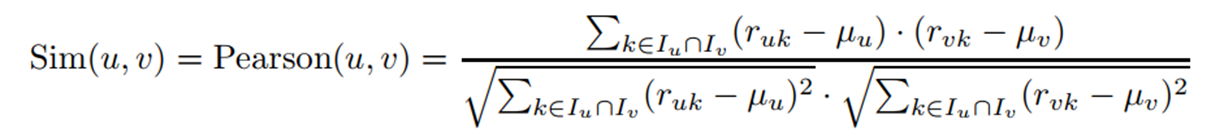

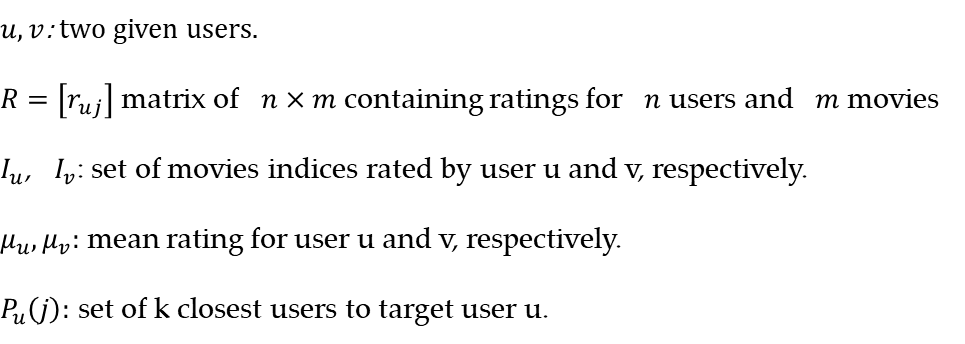

In [ ]:
def intersection(a, b):
    return list(set(a).intersection(b))

In [ ]:
R.shape

(943, 1682)

In [ ]:
df_Pearson = pd.DataFrame()
# define the indexes of users u and v
for u in range(n_users):
  for v in range(n_users):
    if u != v:
      # obtain the set of movies indices rated by users u and v.
      # Hint: use np.where
      I_u = None # ONE LINE HERE!
      I_v = None # ONE LINE HERE!

      # mean rating for users u and v
      # Hint: use np.mean
      mu_u = None # ONE LINE HERE!
      mu_v = None # ONE LINE HERE!

      # indexes of the set of items rated by users u and v
      I_uv = list(set(I_u) & set(I_v))

      if len(I_uv) > 0:
        numerator =  None # ONE LINE HERE!
        denominator = np.sqrt(np.sum(np.power(R[u, I_uv] - mu_u, 2))) * np.sqrt(np.sum(np.power(R[v, I_uv] - mu_v, 2)))

        Pearson = numerator / float(denominator)

      else:
        Pearson = 0

      df_Pearson = pd.concat([df_Pearson, pd.DataFrame([{'user u': u, 'user v': v, 'Pearson_sim': Pearson, 'mu_u': mu_u, 'mu_v': mu_v}])])

  break # let's run this only for the 1st user in R.
df_Pearson = df_Pearson.reset_index(drop = True)

Text(0.5, 0, 'Pearson similarity')

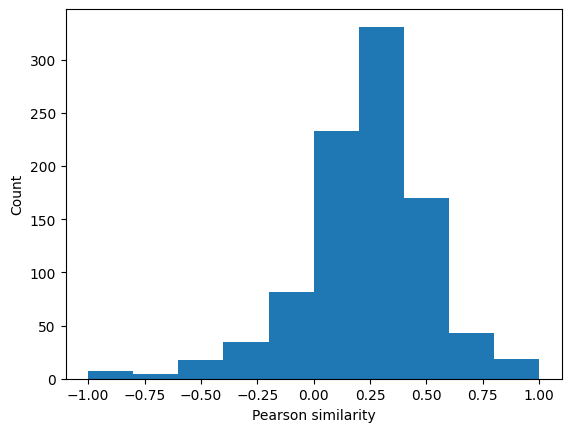

In [ ]:
plt.hist(df_Pearson['Pearson_sim'])
plt.ylabel('Count')
plt.xlabel('Pearson similarity')

Predict for user u and item j

In [ ]:
u = 0
j = 2

# Find the set of k-closest users to target user u that have specified ratings for item j.
k = 5
df_Pearson_ordered = df_Pearson.sort_values(['Pearson_sim'], ascending=False)

# We determine which users specified ratings for item j
idx_users_rated_itemj = np.where(R[:, v] > 0)

# We only keep those users
df_Pu = df_Pearson_ordered.head(k)
num = 0
den = 0

for v in set(df_Pu['user v']):
  dfv = df_Pu[df_Pu['user v'] == v]


  svj = R[v, j] - dfv['mu_v'].values[0]

  num += dfv['Pearson_sim'].values[0] * svj
  den += np.abs(dfv['Pearson_sim'].values[0])

Ruj_hat = df_Pu['mu_u'].values[0] + num / float(den)

print('Predicted rating (u, j) =', Ruj_hat)

Predicted rating (u, j) = 0.6311245527924534


# Item-based RecSys

**Task: Following similar procedure, implement an item-based RecSys using the RawCosine similarity instead of Pearson similarity**